### Import required Libraries

In [298]:
import random as rd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
%matplotlib inline

### Generate the dataset

In [299]:
iris = sklearn.datasets.load_iris()
X = iris.data
Y = iris.target

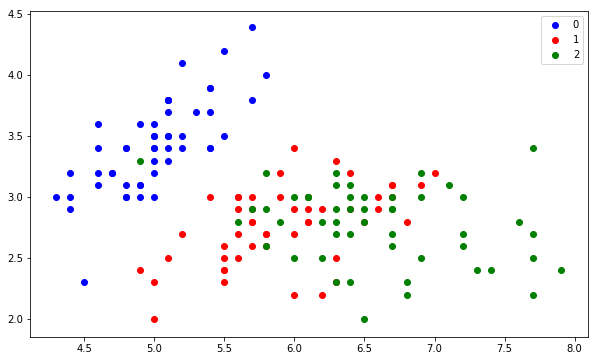

In [300]:
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='1')
plt.scatter(X[Y == 2][:, 0], X[Y == 1][:, 1], color='g', label='2')
plt.legend();

### Get the data and split it into training and testing

In [301]:
N = X.shape[0]
bias = np.ones((N,1))
X = np.concatenate((bias,X),axis=1)

In [302]:
num_classes = len(np.unique(Y))

### Shuffle the Data

In [303]:
order = np.random.permutation(len(X))

In [304]:
X_train = X[order[0:120]]
X_test = X[order[120:]]

Y_train = Y[order[0:120]]
Y_test = Y[order[120:]]

### One Hot encoding

In [271]:
classes = np.unique(Y)
def oneHotEncoding(classes):
    y_enc = (np.arange(np.max(classes) + 1) == classes[:, None]).astype(float)
    return y_enc
classes = oneHotEncoding(classes)
classes

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### The Softmax Function

In [272]:
def softmax(z):
    z = z.reshape(1,-1)
    z -= np.max(z)
    sm = (np.exp(z)/ np.sum(np.exp(z),axis=1))
    return sm

### Define the loss function

In [273]:
def loss(z,y):
    return - np.log(softmax(z))[0][y]

### Define the gradient

In [278]:
def gradient(x,w,y):
    
    grad = np.zeros_like(w)
    
    z = x.dot(w)
    sm = softmax(z)
    
    grad[:,y] = (x * sm[0][y]) - x

    selector = [a for a in range(num_classes) if a != y]
    for j in selector:
        grad[:,j] = (x * sm[0][j])
    
    return grad

### Init the weights

In [279]:
NumOfFeatures = X.shape[1]
w = np.random.rand(NumOfFeatures,num_classes)

### Stochastic Gradient Descent

In [280]:
N = X_train.shape[0] # number of training points

Done = False
lr = 0.01
n_ebochs = 0
epsilon = 1e-5

while not Done:
    n_ebochs = n_ebochs + 1
    
    for i in range(N):
        x = X_train[i]
        y = Y_train[i]
        
        g = gradient(x,w,y)
    
        new_w = w - lr*g
        
        if np.sum(np.abs(new_w - w)) <= epsilon:
            Done = True
            print('converged')
            print(n_ebochs)
            break
        w = new_w

converged
487


In [281]:
def predict(x,w):
    predections = []
    for i in range(x.shape[0]):
        z = x[i].dot(w)
        z = softmax(z)
        z = np.argmax(z,axis=1)
        predections.append(z[0])
    return np.array(predections)    

In [282]:
predections = predict(X_test,w)
print(predections)
print(Y_test)

[0 2 0 2 2 2 0 0 2 1 2 2 2 0 1 2 0 0 2 0 2 2 2 2 2 0 1 2 0 0]
[0 2 0 1 2 2 0 0 2 1 2 2 2 0 1 2 0 0 1 0 2 2 2 2 2 0 1 2 0 0]
